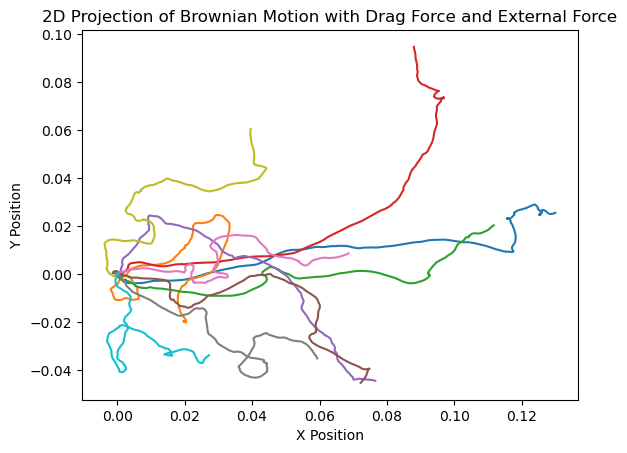

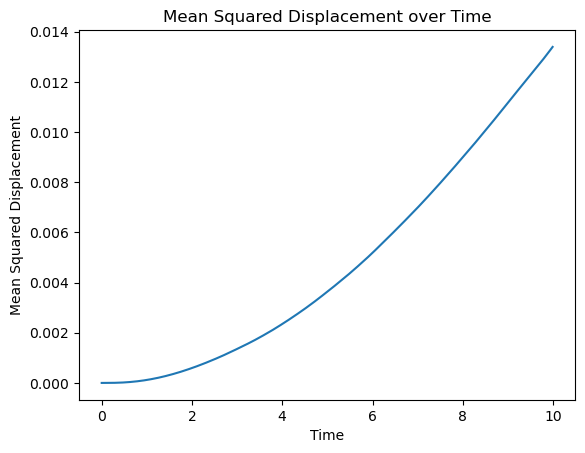

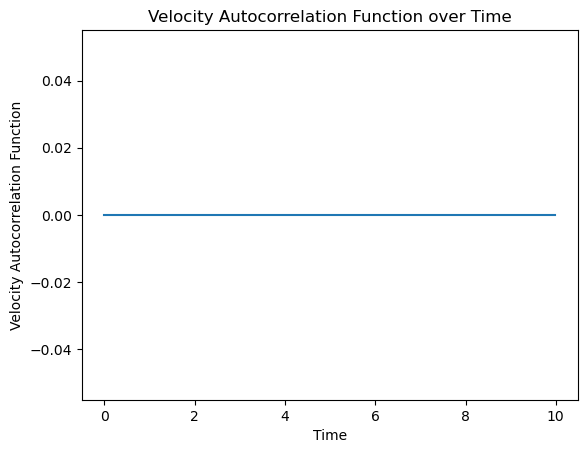

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 1000    # Number of particles
num_steps = 1000        # Number of time steps
time_step = 0.01        # Size of each time step
mass = 1.0              # Mass of the particle
gamma = 1.0             # Drag coefficient
temperature = 1.0       # Temperature in energy units
k_B = 1.0               # Boltzmann constant
external_force = np.array([0.01, 0.0, 0.0])  # External force in x-direction

# Initialize particle positions and velocities
positions = np.zeros((num_particles, num_steps, 3))  # 3D positions
velocities = np.zeros((num_particles, num_steps, 3))  # 3D velocities

# Random force coefficient
random_coeff = np.sqrt(2 * gamma * k_B * temperature / mass)

# Simulate Brownian motion with drag and external force
for i in range(1, num_steps):
    # Generate random forces
    random_force = random_coeff * np.random.normal(0, np.sqrt(time_step), (num_particles, 3))
    # Update velocities with external force
    velocities[:, i, :] = velocities[:, i-1, :] - (gamma / mass) * velocities[:, i-1, :] * time_step + random_force / mass * time_step + external_force * time_step / mass
    # Update positions
    positions[:, i, :] = positions[:, i-1, :] + velocities[:, i, :] * time_step

# Plot the paths of a few particles
for i in range(10):
    plt.plot(positions[i, :, 0], positions[i, :, 1])
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Projection of Brownian Motion with Drag Force and External Force')
plt.show()

# Calculate Mean Squared Displacement (MSD)
msd = np.mean(np.sum(positions**2, axis=2), axis=0)

# Plot Mean Squared Displacement over time
plt.figure()
plt.plot(np.arange(num_steps) * time_step, msd)
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement over Time')
plt.show()

# Calculate Velocity Autocorrelation Function (VACF)
vacf = np.mean(np.sum(velocities[:, 0, :] * velocities[:, :, :], axis=2), axis=0)

# Plot Velocity Autocorrelation Function
plt.figure()
plt.plot(np.arange(num_steps) * time_step, vacf)
plt.xlabel('Time')
plt.ylabel('Velocity Autocorrelation Function')
plt.title('Velocity Autocorrelation Function over Time')
plt.show()


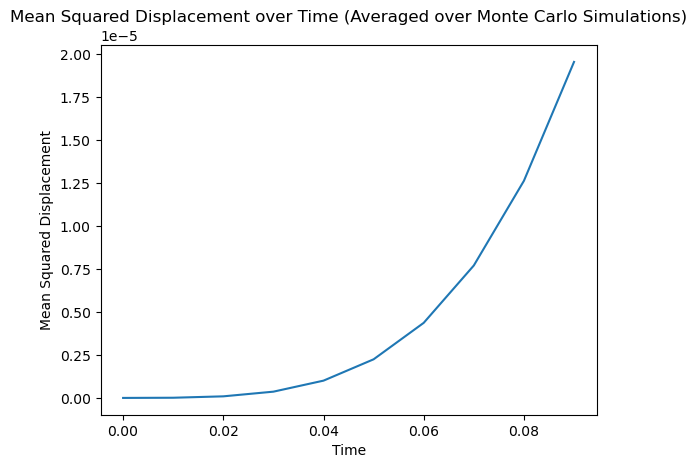

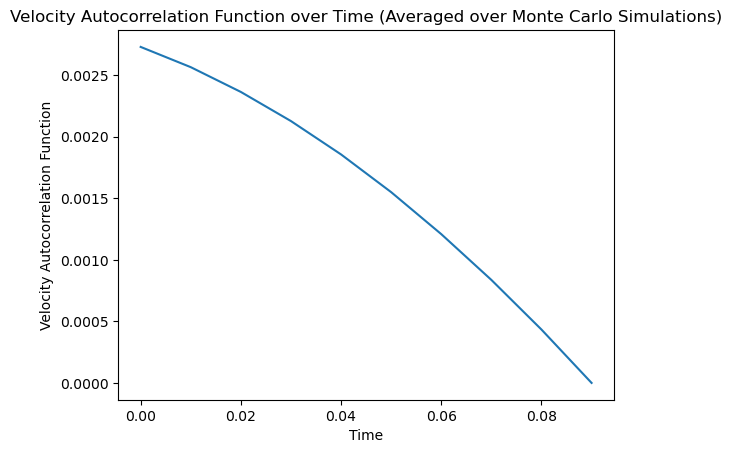

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 10    # Number of particles
num_steps = 10        # Number of time steps
time_step = 0.01      # Size of each time step
mass = 1.0            # Mass of the particle
gamma = 1.0           # Drag coefficient
temperature = 1.0     # Temperature in energy units
k_B = 1.0             # Boltzmann constant
external_force = np.array([1.0, 0.0, 0.0])  # External force in x-direction
num_simulations = 10  # Number of Monte Carlo simulations

# Random force coefficient
random_coeff = np.sqrt(2 * gamma * k_B * temperature / mass)

# Preallocate arrays
positions = np.zeros((num_simulations, num_particles, num_steps, 3))
velocities = np.zeros((num_simulations, num_particles, num_steps, 3))

# Time evolution using Monte Carlo sampling
for sim in range(num_simulations):
    # Initialize velocities for each simulation
    velocities[sim, :, 0, :] = 0
    positions[sim, :, 0, :] = 0
    
    for t in range(1, num_steps):
        # Generate random forces for this time step
        random_forces = random_coeff * np.random.normal(0, np.sqrt(time_step), (num_particles, 3))

        # Update velocities
        velocities[sim, :, t, :] = decay * velocities[sim, :, t-1, :] \
                                   + random_forces / mass * time_step \
                                   + external_force * time_step / mass
        
        # Update positions
        positions[sim, :, t, :] = positions[sim, :, t-1, :] + velocities[sim, :, t, :] * time_step

# Calculate Mean Squared Displacement (MSD) averaged over all simulations
msd = np.mean(np.mean(np.sum(positions**2, axis=3), axis=1), axis=0)

# Plot Mean Squared Displacement over time
plt.figure()
plt.plot(np.arange(num_steps) * time_step, msd)
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement over Time (Averaged over Monte Carlo Simulations)')
plt.show()

# Calculate Velocity Autocorrelation Function (VACF) averaged over all simulations
vacf = np.zeros(num_steps)

for tau in range(num_steps):
    if tau < num_steps:
        velocities_t = velocities[:, :, :-tau, :] if tau > 0 else velocities[:, :, :, :]
        velocities_t_plus_tau = velocities[:, :, tau:, :] if tau > 0 else velocities[:, :, :, :]

        if velocities_t.shape[2] > 0:  # Ensure valid dimension for dot product
            dot_product = np.sum(velocities_t * velocities_t_plus_tau, axis=3)
            vacf[tau] = np.mean(np.mean(np.mean(dot_product, axis=1), axis=0))

# Plot Velocity Autocorrelation Function
plt.figure()
plt.plot(np.arange(num_steps) * time_step, vacf)
plt.xlabel('Time')
plt.ylabel('Velocity Autocorrelation Function')
plt.title('Velocity Autocorrelation Function over Time (Averaged over Monte Carlo Simulations)')
plt.show()
